Learning Source: https://www.youtube.com/watch?v=iwFDa56tBNA

In [41]:
# about downloading package https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
# python -m pip install <package>
import sys
#!conda install --yes --prefix {sys.prefix} openpyxl
!conda install --yes --prefix {sys.prefix} pillow

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\admin\anaconda3\envs\k0py37

  added / updated specs:
    - pillow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py37haa95532_0         141 KB
    ------------------------------------------------------------
                                           Total:         141 KB

The following packages will be UPDATED:

  certifi                          2020.11.8-py37haa95532_0 --> 2020.12.5-py37haa95532_0




certifi-2020.12.5    | 141 KB    |            |   0% 
certifi-2020.12.5    | 141 KB    | ########## | 100% 
certifi-2020.12.5    | 141 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [3]:
from openpyxl import Workbook, load_workbook
import random
#k0py37

###### Create files

In [8]:
# Workbook is the excel file, Worksheet is a sheet in the excel file

# Create an Excel file, will by default create a sheet called "Sheet"
fileName = "happiness.xlsx"
wb = Workbook()

ws = wb.active
print("Default sheet name: ", ws.title)

Default sheet name:  Sheet


###### Sheet

In [10]:
# Change sheet name
ws.title = "Sheet1"

# Change tab color
ws.sheet_properties.tabColor = "FF0101"

In [11]:
# Creat new sheet
ws1 = wb.create_sheet("Mysheet1") # insert at the end
ws2 = wb.create_sheet("Mysheet2", 0) # insert at first
ws3 = wb.create_sheet("Mysheet3", -1) # insert before the last sheet

In [15]:
# Iterate to check what sheets I have so far
for sheet in wb.sheetnames:
    print("sheet：",sheet)

sheet： Mysheet2
sheet： Sheet11
sheet： Mysheet3
sheet： Mysheet1


In [18]:
# Select sheet
ws3 = wb["Mysheet3"]

In [19]:
# Change active sheet
wb.active = wb["Mysheet3"]
ws3 = wb.active

###### Cell

In [20]:
# Assign value to shells
ws3["A1"]=1
cell = ws3["A1"]
print("A1: ",cell.value)

A1:  1


In [23]:
# batch process assigning value
cell_range = ws3["A1":"C5"]
for row in cell_range: # finish one row and start the second
    for cell in row:
        print("row{0}column{1}value{2}".format(cell.row,cell.column,cell.value))
        cell.value = random.randint(1,100)

row1column1value25
row1column2value50
row1column3value81
row2column1value92
row2column2value74
row2column3value94
row3column1value21
row3column2value34
row3column3value48
row4column1value58
row4column2value54
row4column3value25
row5column1value78
row5column2value65
row5column3value40


In [24]:
# iterate all rows first
for row in ws3.iter_rows(min_row = 1 , min_col=2, max_row=2,max_col=3):
    for cell in row:
        print("row{0}column{1}value{2}".format(cell.row,cell.column,cell.value))

row1column2value51
row1column3value84
row2column2value80
row2column3value66


In [27]:
# iterate all columns first
for col in ws3.iter_cols(min_row = 1 , min_col=2, max_row=2,max_col=3):
    for cell in col:
        print("row{0}column{1}value{2}".format(cell.row,cell.column,cell.value))

row1column2value51
row2column2value80
row1column3value84
row2column3value66


In [28]:
# only iterate values (by row)
for row in ws3.values:
    print(row)

(33, 51, 84)
(24, 80, 66)
(49, 81, 49)
(49, 55, 61)
(4, 84, 23)


###### save

In [30]:
# save
wb.save(fileName)

###### Load existing filea

In [31]:
wb=load_workbook(fileName)
ws=wb.active
for row in ws.values:
    print(row)

(33, 51, 84)
(24, 80, 66)
(49, 81, 49)
(49, 55, 61)
(4, 84, 23)


In [33]:
ws = wb.create_sheet("Exercise")
cell_range = ws["A1":"D6"]
for row in cell_range:
    for cell in row:
        cell.value = random.randint(1,100)

###### find max/min/sum value in the sheet

In [34]:
maxValue=0
minValue=101
sum=0
for row in ws.iter_rows(min_row=1, max_row=6, min_col=1, max_col=4, values_only=True):
    for val in row:
        if val>maxValue:
            maxValue=val
        if val<minValue:
            minValue=val
        sum+=val

In [35]:
# save max/min/sum value
ws["D7"] = maxValue
ws["D8"] = minValue
ws["D9"] = sum

wb.save(fileName)

###### Practice

In [3]:
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

In [5]:
fileName = "name.xlsx"
wb=load_workbook(fileName)
ws=wb.active
# insert line
ws.insert_rows(6) # if insert multiple lines:ws.insert_rows(6,n)
row6 = ws[6]
newDatas = ["Wendy","Female","1884-12-03",26]
for row in ws["A6":"D6"]:
    for index in range(len(row)):
        row[index].value = newDatas[index]

###### Delete

In [ ]:
ws.delete_row(7,2) # delete line7&8

###### Move secions

In [ ]:
ws.move_range("A1:D12",rows=4,cols=2)#down4,right2
ws.move_range("A1:D12",rows=-1,cols=-2)#up1,left2

###### Insert Images

In [45]:
ws1 = wb.create_sheet("beauty")
img1=Image("1.jpg")
img2=Image("2.jpg")
ws1.merge_cells("A1:G27")
ws1.merge_cells("I1:Q47")
# unmerge_cells

ws1.add_image(img1,"A1")
ws1.add_image(img2,"I1")

wb.save(fileName)

###### Practice2

In [15]:
# delete all "季前赛"
# insert a line in the front
# add title
# mergeA1&B1

filename="2.xlsx"
wb = load_workbook(filename)
ws=wb["nba"]
datas=["19-20","常规赛",113.4,48,88.3,34.9,31.6,72.9,24.3,45.7,25.4,8.6,6.6,6.8]
titles=["赛季","","得分","命中%","出手","三分%","三分出手","罚球%","罚球出手","篮板","助攻","抢断","盖帽","犯规"]
deletRows=[] #store value to be deleted  
#delete should start from end to start,otherwise row number changes

for cell in ws["B"]:
    if cell.value == "季前赛":
        deletRows.append(cell.row)
for index in range(len(deletRows)-1,-1,-1):
    ws.delete_rows(deletRows[index])
    
    
    
ws.insert_rows(1)
index=0
for row in ws.iter_rows(min_row=1,max_row=1,min_col=1,max_col=14):
    for cell in row:
        cell.value = datas[index]
        index+=1

ws.move_range("A1:N4",rows=1)


index=0
for row in ws.iter_rows(min_row=1,max_row=1,min_col=1,max_col=14):
    for cell in row:
        cell.value = titles[index]
        index+=1

ws.merge_cells("A1:N4")



wb.save(filename)


###### Practice 3

In [8]:
from openpyxl import load_workbook
from openpyxl.comments import Comment
from openpyxl.styles import Font,Alignment,PatternFill
from copy import copy

In [9]:
# from openpyxl.styles import PatternFill, Border, Side, Alignment, Protection, Font
# font = Font(name='Calibri',
#                  size=11,
#                  bold=False,
#                  italic=False,
#                 vertAlign=None,
#                 underline='none',
#                 color='FF000000')
# fill = PatternFill(fill_type=None,
#                start_color='FFFFFFFF',
#                 end_color='FF000000')
# border = Border(left=Side(border_style=None,
#                           color='FF000000'),
#                 right=Side(border_style=None,
#                            color='FF000000'),
#                 top=Side(border_style=None,
#                          color='FF000000'),
#                 bottom=Side(border_style=None,
#                             color='FF000000'),
#                 diagonal=Side(border_style=None,
#                               color='FF000000'),
#                 diagonal_direction=0,
#                  outline=Side(border_style=None,
#                              color='FF000000'),
#                 vertical=Side(border_style=None,
#                               color='FF000000'),
#                 horizontal=Side(border_style=None,
#                                 color='FF000000')
#                )
# alignment=Alignment(horizontal='general',
#                      vertical='bottom',
#                     text_rotation=0,
#                     wrap_text=False,
#                      shrink_to_fit=False,
#                    indent=0)
# protection = Protection(locked=True,
#                         hidden=False)

In [5]:
fileName = "3.xlsx"
wb = load_workbook(fileName)

ws=wb["1月销售情况"]

titleFont=Font(size=18,bold=True)
centerAlign=Alignment(horizontal="center",vertical="center")

colTitleFont=Font(size=11,bold=True)
normalFont=Font(size=11)
maxValFont=copy(normalFont)  #必须copy，否则改maxValFont颜色时，normalFont的颜色也会跟着变
maxValFont.color="7030A0"
minValFont=copy(normalFont)
minValFont.color="FFFF00"
maxValFill=PatternFill(fill_type="solid",fgColor="00FF00")
minValFill=PatternFill(fill_type="solid",fgColor="FF0000")


ws['A1'].font=titleFont
ws['A1'].alignment=centerAlign


for row in ws["A2:C2"]:
    for cell in row:
        cell.font=colTitleFont
        cell.alignment=centerAlign
        

maxDic={}
minDic={}
for row in ws.iter_rows(min_row=3,max_row=10,min_col=1,max_col=3):
    for cell in row:
        cell.alignment=centerAlign
    loc=row[0].value
    val=row[2].value
    
    if loc in maxDic.keys():
        if val>maxDic[loc].value:
            maxDic[loc]=row[2]
    else:
        maxDic[loc]=row[2]
        
    if loc in minDic.keys():
        if val<minDic[loc].value:
            minDic[loc]=row[2]
    else:
        maxDic[loc]=row[2]
        
        
for cell in maxDic.values():
    rowIndex = cell.row
    for row in ws.iter_rows(min_row=rowIndex,max_row=rowIndex,min_col=1,max_col=3):
        for ce in row:
            ce.fill = maxValFill
            ce.font = maxValFont

for cell in minDic.values():
    rowIndex = cell.row
    for row in ws.iter_rows(min_row=rowIndex, max_row=rowIndex, min_col=1, max_col=3):
        for ce in row:
            ce.fill = minValFill
            ce.font = minValFont

In [15]:
maxDic

{'华东': <Cell '1月销售情况'.C10>, '华北': <Cell '1月销售情况'.C9>}

In [17]:
# add comment
comment = Comment("本年度各地区销售情况，红色为该区末尾，绿色为首位","feige")
comment.width = 300
comment.height = 50
ws["A1"].comment = comment
wb.save(fileName)
                  

###### practice. calculation across multiple sheets

In [2]:
# 1-3月的销售情况表，sum total sales amount per person for the three months
# mark the most and the least
# save to new sheet"1-3"

def getOneSheetinfo(sheetName):
    infos = {}
    ws = wb[sheetName]
    for row in ws.iter_rows(min_row=3,max_row=10,min_col=1,max_col=3):
        info = []
        for cell in row:
           info.append(cell.value)
        infos[info[1]] = info
    return infos

In [6]:
wb = load_workbook(fileName)
dic = {}
# {"人名":["人名","区域","销售总额"]，...}
needSheets = ["1月销售情况","2月销售情况","3月销售情况"]
for sheet in wb.sheetnames:
    if sheet in needSheets:
        oneSheetDic = getOneSheetinfo(sheet)
       # print(oneSheetDic)
        for key,value in oneSheetDic.items():
            if key in dic.keys():
                # print(dic[key][2])
                dic[key][2] += value[2]
            else:
                dic[key] = value

ws = wb.create_sheet("1-3月销售情况")

ws.merge_cells("A1:C1")
ws['A1'] = '1-3月销售情况'
ws['A1'].font = titleFont
ws['A1'].alignment = centerAlign

ws['A2'] = '区域'
ws['B2'] = '员工'
ws['C2'] = '销售总额'
for index in ['A2','B2','C2']:
    ws[index].font = colTitleFont
    ws[index].alignment = centerAlign

In [ ]:
# # '3'
# rowIndex = 3
# maxRowIndex = 3
# maxValue = 0
# minRowIndex = 3
# minValue = 1000000
# for value in dic.values():
#     ws['A'+str(rowIndex)] = value[0]
#     ws['B'+str(rowIndex)] = value[1]
#     ws['C'+str(rowIndex)] = value[2]
#     if value[2] > maxValue:
#         maxValue = value[2]
#         maxRowIndex = rowIndex
#     if value[2] < minValue:
#         minValue = value[2]
#         minRowIndex = rowIndex
#     rowIndex += 1

# for col in ['A','B','C']:
#     ws[col + str(maxRowIndex)].fill = maxValFill
#     ws[col + str(maxRowIndex)].font = maxValFont
#     ws[col + str(minRowIndex)].fill = minValFill
#     ws[col + str(minRowIndex)].font = minValFont

# wb.save(fileName)

###### Draw Graphs

In [11]:
from openpyxl import load_workbook
from openpyxl.chart import (AreaChart,Reference,LineChart)
from openpyxl.chart.shapes import GraphicalProperties
import copy

In [12]:
fileName = "Lesson4.xlsx"
wb = load_workbook(fileName)
ws = wb.active

In [13]:
#面积图 Area Chart
areaChart = AreaChart()
xdata = Reference(ws,min_col=1,max_col=1,min_row=2,max_row=241)
ydata = Reference(ws,min_col=2,max_col=2,min_row=2,max_row=241)
areaChart.add_data(ydata,titles_from_data=False) # whether include title
areaChart.set_categories(xdata)

In [16]:
# Edit Fill Color
s = areaChart.series[0]
s.graphicalProperties.solidFill = "04A5DC"
areaChart.title = "Apple Stock Price Area Chart"
ws.add_chart(areaChart,'E40') #put the graph at E1

In [17]:
#折线图 Line Chart
lineChart = LineChart()
lineChart.title = "Apple Stock Price Line Chart"
ydata = Reference(ws,min_col=3,max_col=3,min_row=2,max_row=241)
lineChart.add_data(ydata,titles_from_data=False)
lineChart.set_categories(xdata)
props = GraphicalProperties(solidFill="#dcbff2")
s = lineChart.series[0]
s.graphicalProperties.line.solidFill = "02536E"
ws.add_chart(lineChart,'N40')

In [18]:
# line Chart + Area Chart
areaChart_copy = copy.deepcopy(areaChart)
lineChart_copy = copy.deepcopy(lineChart)
areaChart_copy.legend = None
lineChart_copy.legend = None
lineChart_copy += areaChart_copy
lineChart_copy.title = "Apple Stock Price Chart"

# set backgroung color
props = GraphicalProperties(solidFill="CEDBE7")
lineChart_copy.plot_area.graphicalProperties = props

# y-axis position
lineChart_copy.y_axis.crosses = 'max' #Y-axis is at the max x side, which is right
# get rid of gridlines
lineChart_copy.y_axis.majorGridlines = None

ws.add_chart(lineChart_copy,"J60")

wb.save(fileName)

###### More Graphs

In [10]:
from openpyxl import load_workbook
from openpyxl.chart import (BarChart,StockChart,Reference,Series)
from openpyxl.chart.axis import ChartLines
from openpyxl.chart.updown_bars import UpDownBars

In [11]:
#data structure ["Date","Volumn","Open","High","Low","Close"]
fileName = "AAPL.xlsx"
#length/width
ratio = 2
wb = load_workbook(fileName)
ws = wb.active

In [12]:
c1 = StockChart()
maxRow = ws.max_row // 10
labels = Reference(ws,min_col=1,min_row=2,max_row=maxRow) # dates
data = Reference(ws,min_col=4,max_col=6,min_row=1,max_row=maxRow) #High Low Close
c1.add_data(data,titles_from_data=True)
c1.set_categories(labels)
for s in c1.series:
    s.graphicalProperties.line.noFill = True
s.marker.symbol = "dot"
s.marker.size = 5
c1.title = "High-low-close"
c1.hiLowLines = ChartLines()
c1.height *= ratio
c1.width *= ratio

In [13]:
# error bars
from openpyxl.chart.data_source import NumData,NumVal
pts = [NumVal(idx = i) for i in range(len(data)-1)]
cache = NumData(pt = pts)
c1.series[-1].val.numRef.numCache = cache

ws.add_chart(c1,"G50")

In [14]:
c2 = StockChart()
data = Reference(ws,min_col=3,max_col=6,min_row=1,max_row=maxRow) #"Open","High","Low","Close"
c2.add_data(data,titles_from_data=True)
c2.set_categories(labels)
for s in c2.series:
    s.graphicalProperties.line.noFill = True

c2.hiLowLines = ChartLines()
c2.upDownBars = UpDownBars()
c2.title = "Open-high-low-close"
c2.series[-1].val.numRef.numCache = cache

c2.width *= ratio
c2.height *= ratio

ws.add_chart(c2,"W50")

In [15]:
bar = BarChart()
data = Reference(ws,min_col=2,min_row=1,max_row=maxRow)
bar.add_data(data,titles_from_data=True)
bar.set_categories(labels)

from copy import deepcopy
b1 = deepcopy(bar)
c3 = deepcopy(c1)
c3.y_axis.majorGridlines = None
c3.y_axis.title = "Price"
b1.y_axis.axId = 20 # must assign. otherwise, the next line doesn't work
b1.z_axis = c3.y_axis
b1.y_axis.crosses = "max" # to the right
b1 += c3

c3.title = "High low close volume"
b1.height *= ratio
b1.width *= ratio

ws.add_chart(b1,"G80")

In [16]:
b2 = deepcopy(bar)
c4 = deepcopy(c2)
c4.y_axis.majorGridlines = None
c4.y_axis.title = "Price"
b2.y_axis.axId = 2
b2.z_axis = c4.y_axis
b2.y_axis.crosses = "max"
b2 += c4

b2.width *= ratio
b2.height *= ratio

ws.add_chart(b2,"W80")

wb.save(fileName)

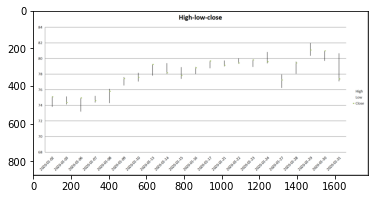

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('c1.png')
imgplot = plt.imshow(img)

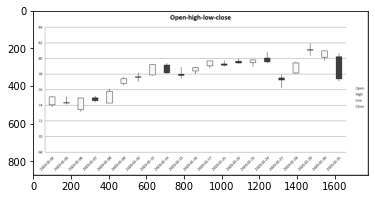

In [21]:
img=mpimg.imread('c2.png')
imgplot = plt.imshow(img)

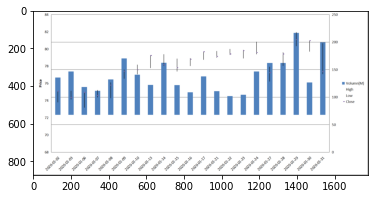

In [22]:
img=mpimg.imread('b1.png')
imgplot = plt.imshow(img)

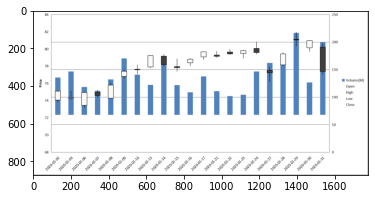

In [23]:
img=mpimg.imread('b2.png')
imgplot = plt.imshow(img)